## Quantitative Analysis / Time Series Stuff (1)


### Unit Roots Tests 
Let us consider a time series Yt in the form $$ Y_t = \alpha + \beta Y_{t-1} + u_t $$ $$ u_t - \rho u_{t-1} | \epsilon_t $$

In [9]:
# Install the yfinance module
import yfinance as yf
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker 
import numpy as np 

In [10]:
bto = yf.Ticker("BZ=F")
clf = yf.Ticker("CL=F")
coaca = yf.Ticker("CC=F")
sugar = yf.Ticker("SB=F")
spy = yf.Ticker("SPY")
kmx = yf.Ticker("KMX")


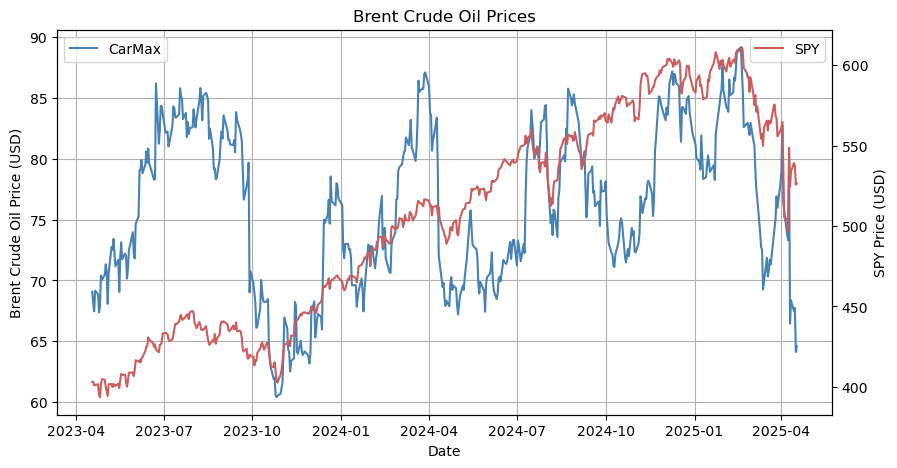

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))  # Create a figure and axes
ax2 = ax.twinx()  # Create a twin axes sharing the x-axis

ax.set_title("Brent Crude Oil Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Brent Crude Oil Price (USD)")
ax2.set_ylabel("SPY Price (USD)")

ax.grid()
ax.plot(kmx.history(period="2y")["Close"], label="CarMax", color='steelblue')
ax2.plot(spy.history(period="2y")["Close"], label="SPY", color='indianred')

ax.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()

### Auto-Correlation & Cross Correlation - Theory 
Autocorrelation means when the errors we observe from our regression is not exactly random errors, meaning they have an observable or testable patterns (whether that's first order or higher orders), for example, seasonality of oil prices is one factor that contributes to the auto-correlation of its price data.

- **The Visual Inspection Method**
    - As shown below, we could run a regression first on the SPY stock chart, then we generate its residual plot, a **residual plot** means that we are turning the regression line to y=0, and vertifically shift the associated data points by the same distance quantified by the errors values. Based on the example below, we can see that it's very obvious the SPY stock chart have a snaky pattern in its price trends, this is an indication of economic cycle in which we must take into account if we are building regression models today. Our ultimate goal is to always cancel out the autocorrelation effects by taking into accounts of different realistic causes in the real world. 
- **Durbin Watson Method** First Order Autocorrelation Testing 
    - The Durbin Watson Method tests for first order autocorrelation by assessing the relationship between successive error terms, 
    the error term at k may affect the error term at k+1, this can be measured with the Durbin Watson Method, however, the err term at k may also affect the error term observed at k+2, k+3...k+n, and this is somethign Durbin Watson Method is more limited at. 

   
    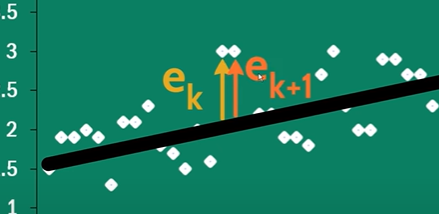

    $$ dw = \frac{(e_{2}-e_{1})^2+(e_{3}-e_{2})^2+...+(e_{n}-e_{n-1})^2}{(e^2_1+e^2_2+e^2_n...)}$$

    - If we test for positive or negative autocorrelation, we can't really rely on the **results of our regression analysis report** and by that I mean the SE, t and p, the coeffcients are still independent of the auto-correlation. And example can be provided in the example below with SPY 

### Auto-Correlation & Cross Correlation - Applications 

Regression and Residual Plots 

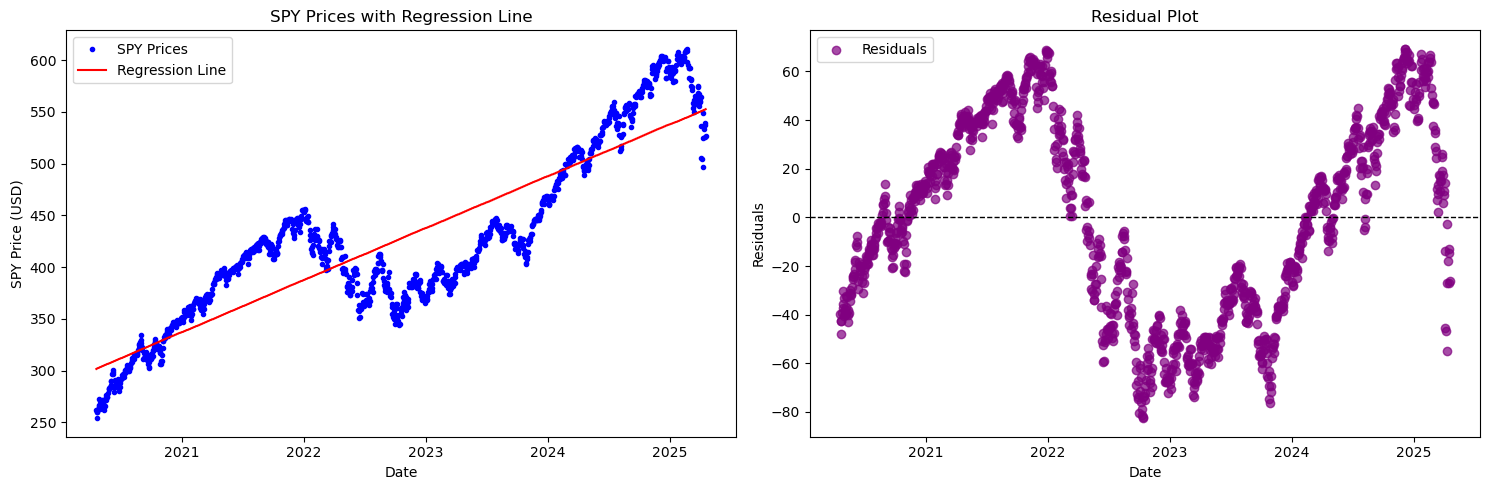

In [25]:
from sklearn.linear_model import LinearRegression

# Prepare data for regression
spy_data = spy.history(period="5y")["Close"]
dates = np.arange(len(spy_data)).reshape(-1, 1)  # Convert dates to numerical indices
prices = spy_data.values.reshape(-1, 1)

# Perform linear regression
model = LinearRegression()
model.fit(dates, prices)
predicted_prices = model.predict(dates)

# Calculate residuals
residuals = prices - predicted_prices

# Create subplots for regression and residual plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot regression line
ax1.set_title("SPY Prices with Regression Line")
ax1.set_xlabel("Date")
ax1.set_ylabel("SPY Price (USD)")
ax1.plot(spy_data.index, prices, marker='.', linestyle='', label="SPY Prices", color='blue')
ax1.plot(spy_data.index, predicted_prices, label="Regression Line", color='red')
ax1.legend()

# Plot residuals
ax2.set_title("Residual Plot")
ax2.set_xlabel("Date")
ax2.set_ylabel("Residuals")
ax2.axhline(0, color='black', linestyle='--', linewidth=1)  # Add y=0 line
ax2.scatter(spy_data.index, residuals, color='purple', label="Residuals", alpha=0.7)
ax2.legend()

plt.tight_layout()
plt.show()


Durbin Watson Method Application 

In [ ]:
from statsmodels.stats.stattools import durbin_watson
gfg = durbin_watson(spy_data)
gfg # Output: 0.000121 (close to 2 indicates no autocorrelation)
import statsmodels.api as sm

s
print(regression_model.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     4127.
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:54:39   Log-Likelihood:                -6421.1
No. Observations:                1257   AIC:                         1.285e+04
Df Residuals:                    1255   BIC:                         1.286e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        301.5303      2.258    133.542      0.0